# Vídeo

Link do vídeo corrigido(acesso livre): https://drive.google.com/file/d/1nNTC3PdpmabNhl40qVKXIu_IH-EAOW-i/view?usp=sharing

# Modelo

11490434/11490434 [==============================] - 0s 0us/step


Epoch 1/20
469/469 - 31s - loss: 1.4090 - accuracy: 0.5570 - val_loss: 0.4071 - val_accuracy: 0.8905 - 31s/epoch - 67ms/step
Epoch 2/20
469/469 - 30s - loss: 0.3039 - accuracy: 0.9118 - val_loss: 0.2448 - val_accuracy: 0.9280 - 30s/epoch - 64ms/step
Epoch 3/20
469/469 - 29s - loss: 0.2036 - accuracy: 0.9406 - val_loss: 0.1604 - val_accuracy: 0.9549 - 29s/epoch - 61ms/step
Epoch 4/20
469/469 - 30s - loss: 0.1610 - accuracy: 0.9526 - val_loss: 0.1436 - val_accuracy: 0.9579 - 30s/epoch - 65ms/step
Epoch 5/20
469/469 - 30s - loss: 0.1350 - accuracy: 0.9608 - val_loss: 0.1313 - val_accuracy: 0.9591 - 30s/epoch - 63ms/step
Epoch 6/20
469/469 - 30s - loss: 0.1174 - accuracy: 0.9661 - val_loss: 0.0945 - val_accuracy: 0.9705 - 30s/epoch - 63ms/step
Epoch 7/20
469/469 - 33s - loss: 0.1056 - accuracy: 0.9686 - val_loss: 0.0969 - val_accuracy: 0.9677 - 33s/epoch - 69ms/step
Epoch 8/20
469/469 - 30s - loss: 0.0958 - accuracy: 0.9717 - val_loss: 0.0817 - val_accuracy: 0.9738 - 30s/epoch - 64ms/step


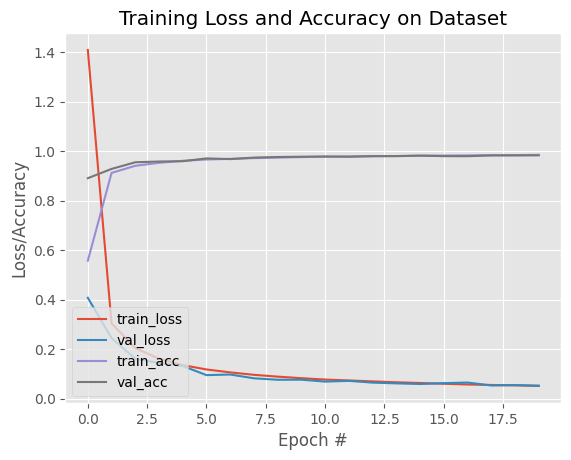

In [ ]:
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitetura LeNet-5
class LeNet5:
    @staticmethod
    def build(width, height, channels, classes):
        inputShape = (height, width, channels)
        model = Sequential()
        model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(16, (5, 5), padding="valid"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))
        model.add(Dense(84))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

# Carregar e preparar o dataset MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Inicialização e compilação do modelo
model = LeNet5.build(28, 28, 1, 10)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Medição do Tempo de Treinamento
start_time = time.time()
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=2)
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

# Medição do Tempo de Inferência
start_time = time.time()
predictions = model.predict(testX, batch_size=128)
elapsed_time = time.time() - start_time
print(f"Tempo total de inferência: {elapsed_time:.2f} segundos")

# Avaliação do modelo
scores = model.evaluate(testX, testY, verbose=0)
print(f"Accuracy: {scores[1]*100}%")

# Plotar a perda e a precisão do modelo
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 20), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 20), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 20), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 20), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy on Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')
plt.show()


## Teste com Weight And Biases

In [ ]:
!pip install wandb
import wandb
from wandb.integration.keras import WandbCallback

# Inicializar o Weights & Biases
wandb.login()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:

import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import tensorflow as tf

# Arquitetura LeNet-5
class LeNet5:
    @staticmethod
    def build(width, height, channels, classes):
        inputShape = (height, width, channels)
        model = Sequential()
        model.add(Conv2D(6, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(16, (5, 5), padding="valid"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))
        model.add(Dense(84))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

# Carrega e prepara o dataset MNIST
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# Inicialização do Weights & Biases
wandb.init(project='lenet-mnist', entity='meyasmin1', name='CPU')

# Inicialização e compilação do modelo
model = LeNet5.build(28, 28, 1, 10)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Medição do Tempo
start_time = time.time()
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=20, verbose=2, callbacks=[WandbCallback()])
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

wandb.log({'Training time': elapsed_time})
wandb.finish()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 36s - loss: 1.2042 - accuracy: 0.6388 - val_loss: 0.3844 - val_accuracy: 0.8828 - 36s/epoch - 76ms/step
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 31s - loss: 0.2894 - accuracy: 0.9136 - val_loss: 0.2136 - val_accuracy: 0.9392 - 31s/epoch - 67ms/step
Epoch 3/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 33s - loss: 0.1949 - accuracy: 0.9409 - val_loss: 0.1491 - val_accuracy: 0.9554 - 33s/epoch - 70ms/step
Epoch 4/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 33s - loss: 0.1517 - accuracy: 0.9543 - val_loss: 0.1370 - val_accuracy: 0.9615 - 33s/epoch - 71ms/step
Epoch 5/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 35s - loss: 0.1288 - accuracy: 0.9611 - val_loss: 0.1106 - val_accuracy: 0.9669 - 35s/epoch - 74ms/step
Epoch 6/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 33s - loss: 0.1125 - accuracy: 0.9652 - val_loss: 0.0971 - val_accuracy: 0.9698 - 33s/epoch - 70ms/step
Epoch 7/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 32s - loss: 0.1013 - accuracy: 0.9691 - val_loss: 0.0898 - val_accuracy: 0.9703 - 32s/epoch - 68ms/step
Epoch 8/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 31s - loss: 0.0931 - accuracy: 0.9717 - val_loss: 0.0821 - val_accuracy: 0.9737 - 31s/epoch - 66ms/step
Epoch 9/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 33s - loss: 0.0859 - accuracy: 0.9731 - val_loss: 0.0762 - val_accuracy: 0.9755 - 33s/epoch - 69ms/step
Epoch 10/20
469/469 - 30s - loss: 0.0809 - accuracy: 0.9751 - val_loss: 0.0875 - val_accuracy: 0.9725 - 30s/epoch - 64ms/step
Epoch 11/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 34s - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0712 - val_accuracy: 0.9750 - 34s/epoch - 72ms/step
Epoch 12/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 33s - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.0684 - val_accuracy: 0.9778 - 33s/epoch - 70ms/step
Epoch 13/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 31s - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0651 - val_accuracy: 0.9778 - 31s/epoch - 67ms/step
Epoch 14/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 31s - loss: 0.0653 - accuracy: 0.9799 - val_loss: 0.0577 - val_accuracy: 0.9814 - 31s/epoch - 66ms/step
Epoch 15/20
469/469 - 31s - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0661 - val_accuracy: 0.9783 - 31s/epoch - 65ms/step
Epoch 16/20
469/469 - 31s - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0581 - val_accuracy: 0.9808 - 31s/epoch - 67ms/step
Epoch 17/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 32s - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0530 - val_accuracy: 0.9831 - 32s/epoch - 68ms/step
Epoch 18/20
469/469 - 32s - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0611 - val_accuracy: 0.9811 - 32s/epoch - 69ms/step
Epoch 19/20
469/469 - 31s - loss: 0.0529 - accuracy: 0.9838 - val_loss: 0.0551 - val_accuracy: 0.9817 - 31s/epoch - 66ms/step
Epoch 20/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240508_040846-7omnjhz6/files/model-best)... Done. 0.0s


469/469 - 32s - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0525 - val_accuracy: 0.9819 - 32s/epoch - 69ms/step
Tempo total de treinamento: 682.88 segundos
